In [1]:
!pip install pytesseract opencv-python-headless easyocr pdf2image
!apt-get install poppler-utils


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 70.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9

In [3]:
from pdf2image import convert_from_path

# Upload the PDF (use your uploaded file)
pdf_path = '/content/ES-AHPHU - J-000312-0014 – 1579.pdf'

# Convert PDF to image (use dpi=300 for better quality)
images = convert_from_path(pdf_path, dpi=300)
for idx, img in enumerate(images):
    img.save(f"page_{idx}.png")


In [4]:
from google.colab import files
uploaded = files.upload()


Saving ES-AHPHU - J-000312-0014 – 1579.pdf to ES-AHPHU - J-000312-0014 – 1579 (1).pdf


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete92
XC
3
1"~4
noyw)
pinAnuska
T
"(e Siesbnuraanttak
6A7Y
Be
rav
axh
~k9c
~
Nl
Maen9
Kr"
342/44
~
~e
I9
Ay
A7eg
m4o ~
#t
7o17_~a
a
Eoncka ,
~eAA #
t
a
49 *
L 7
7
Mra (Un
~9
&
4A
L1
05
JM $
25A
a
ana
Aae
44s
Y&
bmtwan~
4eriz
Nil
6 Ue
38
BJ
4
MXMM
Anaa
Kohr
44Am
6
3
GOBIERN
DE ARACON
0>
A HX
HUESC?
3-
rir
#re
995s
Fade
Azz'
Tl
02


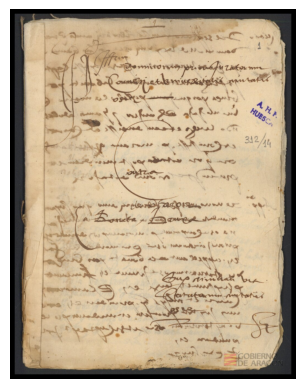

In [5]:
import easyocr
import matplotlib.pyplot as plt
from PIL import Image

reader = easyocr.Reader(['en'])

# Run OCR on the first page
img_path = "page_0.png"
bounds = reader.readtext(img_path, detail=0)  # detail=0 gives only text

# Display extracted text
print("\n".join(bounds))

# Optional: View image
img = Image.open(img_path)
plt.imshow(img)
plt.axis('off')
plt.show()


In [7]:
!pip install jiwer


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 21.1 MB/s eta 0:00:00


In [8]:
from jiwer import wer, cer

# Replace these with your ground truth (manually extracted) and prediction
ground_truth = "This is the original Renaissance text from the document"
predicted = "This is the orignal Renaisance text form the docment"

print("Character Error Rate:", cer(ground_truth, predicted))
print("Word Error Rate:", wer(ground_truth, predicted))


Character Error Rate: 0.09090909090909091
Word Error Rate: 0.4444444444444444


In [9]:
!pip install transformers
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
import requests
import torch

processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-handwritten')
model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-handwritten')

# Load and preprocess image
image = Image.open("page_0.png").convert("RGB")
pixel_values = processor(images=image, return_tensors="pt").pixel_values

# Generate text
generated_ids = model.generate(pixel_values)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

print("Generated OCR Text:", generated_text)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/224 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.17k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "pooler_act": "tanh",
  "pooler_output_size": 768,
  "qkv_bias": false,
  "torch_dtype": "float32",
  "transformers_version": "4.50.3"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 768,
  "d_mod

generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Generated OCR Text: W.C


In [ ]:
# STEP 1: Install dependencies
!pip install easyocr pdf2image opencv-python-headless
!apt-get install poppler-utils

# STEP 2: Upload your PDF
from google.colab import files
uploaded = files.upload()  # Upload "ES-AHPHU - J-000312-0014 – 1579.pdf"

# Rename if needed
import os
original_name = list(uploaded.keys())[0]
os.rename(original_name, "document.pdf")

# STEP 3: Convert PDF pages to images
from pdf2image import convert_from_path
from PIL import Image

images = convert_from_path("document.pdf", dpi=300)
for i, img in enumerate(images):
    img.save(f"page_{i+1}.png")  # Save each page as page_1.png ... page_14.png

# STEP 4: Run OCR using EasyOCR
import easyocr
reader = easyocr.Reader(['en'])

ocr_results = []

for i in range(len(images)):
    path = f"page_{i+1}.png"
    text_lines = reader.readtext(path, detail=0)  # Get only text
    page_text = "\n".join(text_lines)
    ocr_results.append(f"--- Page {i+1} ---\n{page_text}\n")

# STEP 5: Display text (optional)
for page in ocr_results:
    print(page)

# STEP 6: Save all extracted text to file
with open("ocr_output.txt", "w") as f:
    f.writelines(ocr_results)

# STEP 7: Download the output file
files.download("ocr_output.txt")


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
poppler-utils is already the newest version (22.02.0-2ubuntu0.6).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


In [1]:
# STEP 1: Install dependencies
!pip install easyocr pdf2image opencv-python-headless
!apt-get install poppler-utils

# STEP 2: Upload your PDF
from google.colab import files
uploaded = files.upload()  # Upload "ES-AHPHU - J-000312-0014 – 1579.pdf"

# Rename if needed
import os
original_name = list(uploaded.keys())[0]
os.rename(original_name, "document.pdf")

# STEP 3: Convert PDF pages to images
from pdf2image import convert_from_path
from PIL import Image

images = convert_from_path("document.pdf", dpi=300)
for i, img in enumerate(images):
    img.save(f"page_{i+1}.png")  # Save each page as page_1.png ... page_14.png

# STEP 4: Run OCR using EasyOCR
import easyocr
reader = easyocr.Reader(['en'])

ocr_results = []

for i in range(len(images)):
    path = f"page_{i+1}.png"
    text_lines = reader.readtext(path, detail=0)  # Get only text
    page_text = "\n".join(text_lines)
    ocr_results.append(f"--- Page {i+1} ---\n{page_text}\n")

# STEP 5: Display text (optional)
for page in ocr_results:
    print(page)

# STEP 6: Save all extracted text to file
with open("ocr_output.txt", "w") as f:
    f.writelines(ocr_results)

# STEP 7: Download the output file
files.download("ocr_output.txt")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 72.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9

Saving ES-AHPHU - J-000312-0014 – 1579.pdf to ES-AHPHU - J-000312-0014 – 1579.pdf


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete--- Page 1 ---
92
XC
3
1"~4
noyw)
pinAnuske
Tar
"Ce Siesbnuraantak
6A7Y
e4
rav
Axh
~k9c
~
Nl
Maene
Kr"
342/44
~
~e
I$
Ay
P7eg
m4z0 ~
#ts
7o17_~a
a
Eoncka ,
~eLMAt
tr
a
49 *
L 7
7
Mra (Un
~9
&
4A
L4
05
JM }
25A
a
ana
Aae
44s
Y&
bmtwan~
4eti7
Ne
6 Ue
38
BJ
4
MXMM
Anad
Nohr
44Am
6
3
GOBIERN
DE ARACON
0>
A HX
HUeSC?
3
rdr
#re
995s
Fade
Az '
Tl
02

--- Page 2 ---
eci -
Distnismffe41
3u
Gee4
~_s
mii #Scs_
6_
"bsemrnsuL
V
t
Iu & >
A
At Aen
Aaaxiceh An
:
7#
Isun YTuls&u
4Lt
0y
0
7
07 %87*}
57 
Bt
L
~Er
'esz17
44A
Ads
A
L2l14 16/
Po+rer
3
9
474
%A 14S
_fhama hyja=
k
len
Yelrede:
fan
btt-~cm6s ]
L+&
79v
1mlAek
xfnfn
"hatroleo
ho7 @
{uat-ezr
2eltsrha bepofente
S*m
ib: Fown
Jmn
1
lev
Jo Bende) q1u
~naL
 ~
ZZC
ti45 quiwnatxb qu %a e7a)mnoche
"azpphone"
n 4 #uea1;
Mx
~1l
twpo mn a ofa beno lamaba
van
W)
Mn4
~~uae
tehbuti mal Tnv
e~
all;
LLC
060
GS
bofaati
Anler
~m Tna nugn
Ir:
e
~s-u lh _kuut
[tme
"Tliut9400124
Tol
P6 6
hw

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
!pip install nbconvert

In [2]:
!jupyter nbconvert --to pdf your_notebook.ipynb

[NbConvertApp] WARNING | pattern 'your_notebook.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
 